In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams, cycler
from matplotlib.lines import Line2D

# Data reading and filtering

In [2]:
luad_pri = pd.read_csv('../summary_data/survival_results_op-luad_primary.csv')
luad_pri['type'] = "OP-LUAD primary"

luad_nonpri = pd.read_csv('../summary_data/survival_results_op-luad_nonprimary.csv')
luad_nonpri['type'] = "OP-LUAD nonprimary"

breast_pri = pd.read_csv('../summary_data/survival_results_op-brca_primary.csv')
breast_pri['type'] = "OP-BRCA primary"

colorectal_pri = pd.read_csv('../summary_data/survival_results_op-crc_primary.csv')
colorectal_pri['type'] = "OP-CRC primary"


df = pd.concat([luad_pri, luad_nonpri], ignore_index=True)
df = pd.concat([df, breast_pri], ignore_index=True)
df = pd.concat([df, colorectal_pri], ignore_index=True)


df = df.sort_values(by=['type', 'sbt_feature'])
df.to_csv('../summary_data/survival_results_oncopanel.csv')

df['HR'] = np.exp(df['effect']) 
df['HR_max'] = np.exp(df['effect']+df['std']) 
df['HR_min'] = np.exp(df['effect']-df['std']) 


df = df.loc[(df['sbt_feature'].isin(['5S rDNA copy number',  'TCR α Shannon', 'fungal load', 'microbial load', 
                                     'protozoa load','viral load','T cell infiltration','T cell α infiltration',
                                     'TCR γ Shannon']))]


df_complete = df.copy()

# Fig 3 - Survival analysis

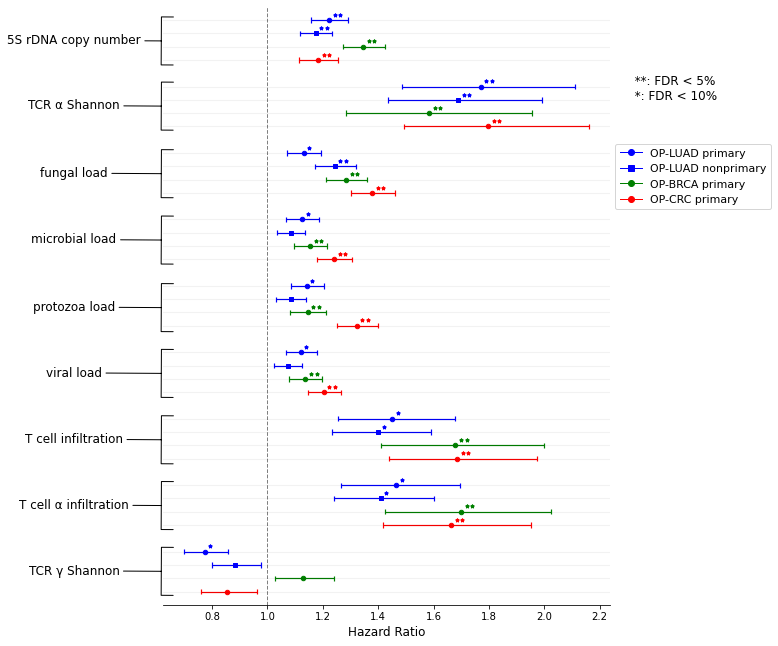

In [3]:
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4)]

custom_markers = [Line2D([0], [0], color = 'b', marker='o',markerfacecolor='b',lw=1),
                  Line2D([0], [0], color = 'b', marker='s',markerfacecolor='b',lw=1),
                  Line2D([0], [0], color = 'g', marker='o',markerfacecolor='g',lw=1),
                  Line2D([0], [0], color = 'r', marker='o',markerfacecolor='r',lw=1)]

fig = plt.figure()
ax = plt.subplot(111)
fig = plt.gcf()
fig.set_size_inches(8,11)

plt.axvline(x=1, color='gray', linestyle='--', lw=1.)


features = ['5S rDNA copy number','TCR α Shannon','fungal load','microbial load','protozoa load',
'viral load','T cell infiltration','T cell α infiltration','TCR γ Shannon']


types = ['OP-LUAD primary', 'OP-LUAD nonprimary', 'OP-BRCA primary','OP-CRC primary']

marker={'OP-LUAD primary':'o', 'OP-LUAD nonprimary':'s', 'OP-BRCA primary':'o','OP-CRC primary':'o'}
color = {'OP-LUAD primary':'b', 'OP-LUAD nonprimary':'b', 'OP-BRCA primary':'g','OP-CRC primary':'r'}

labels = []
y = []

i=100
delta=0


for feature in features:
       
    feature_name = feature
        
    for cancer in types:

        rows = df.loc[(df['type'] == cancer) & (df['sbt_feature'] == feature), ]
        
        delta=1

        for index, row in rows.iterrows():

            plt.scatter(row['HR'], i , s= 20, facecolors = color[row['type']], marker=marker[row['type']], color=color[row['type']], lw=1.)

            if row['qvalue'] < 0.05:
                plt.scatter(row['HR']+0.02, i+0.4 , s=12, facecolors = color[row['type']], marker='*', color=color[row['type']], lw=1.2)
                plt.scatter(row['HR']+0.04, i+0.4 , s=12, facecolors = color[row['type']], marker='*', color=color[row['type']], lw=1.2)

            elif row['qvalue'] < 0.1 :
                plt.scatter(row['HR']+0.02, i+0.4 , s=12, facecolors = color[row['type']], marker='*', color=color[row['type']], lw=1.2)

            plt.hlines(y=i, xmin=row['HR_min'], xmax=row['HR_max'], color=color[row['type']], lw=1.2)

            plt.vlines(x = row['HR_min'], ymin=i-0.2, ymax = i+0.2, color=color[row['type']], lw=1.2)
            plt.vlines(x = row['HR_max'], ymin=i-0.2, ymax = i+0.2, color=color[row['type']], lw=1.2)
            plt.axhline(y=i, color='k', linestyle='-', alpha=0.05, lw=1.2)
            
            labels.append(feature_name)
            feature_name=""
            y.append(i)
            i=i-1
            
    if delta > 0:
        for l in range(0, delta):
            labels.append('')
            y.append(i)
            i=i-1
    delta=0
    
plt.yticks(y, labels, fontsize=12)
plt.yticks([], [], fontsize=12)
plt.ylim(i+1,101)
plt.xlabel('Hazard Ratio', fontsize=12)

ax.legend(custom_markers, ['OP-LUAD primary', 'OP-LUAD nonprimary', 'OP-BRCA primary', 'OP-CRC primary'],
          bbox_to_anchor=(1, 0.78), fontsize=11)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

def add_annotation(ax, text, y, w):
    ax.annotate(text, xy=(-0.0, y+0.01), xytext=(-0.2, y), xycoords='axes fraction', textcoords='axes fraction',
                fontsize=12, ha='center', va='bottom',
                
                arrowprops=dict(arrowstyle=f'-[, widthB={w}, lengthB=1.', lw=1.0))

plt.text(2.3,94,'  **: FDR < 5% \n  *: FDR < 10%', fontsize=12)

add_annotation(ax,'5S rDNA copy number',0.933, 2) 
add_annotation(ax,'TCR α Shannon',0.824, 2) 
add_annotation(ax,'fungal load',0.711, 2) 
add_annotation(ax,'microbial load',0.60, 2) 
add_annotation(ax,'protozoa load',0.487, 2) 
add_annotation(ax,'viral load',0.377, 2) 
add_annotation(ax,'T cell infiltration',0.266, 2) 
add_annotation(ax,'T cell α infiltration',0.156, 2) 
add_annotation(ax,'TCR γ Shannon',0.046, 2) 


plt.savefig('../figures/Fig3_survival_results_op-luad_primary.png', dpi=300, bbox_inches='tight')